In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from collections import namedtuple
from scipy.optimize import curve_fit

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['font.size'] = 12
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "#aaaaaa"
plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [15]:
def readFile(name):
    conv = lambda s: float(s.replace(',', '.'))
    with open(name) as file:
        time = file.readlines()[6].split()[-1].replace(',', '.')
    data = np.genfromtxt(name, skip_header=14, delimiter='\t', converters={0: conv, 1: conv}).T
    data[1] /= float(time)
    return data

names = ["NS-7.txt", "NS-8.txt", "NS-9.txt", "NS-10.txt", "NS-11.txt", "NS-13.txt"]
empty = readFile("EMPTY.txt")

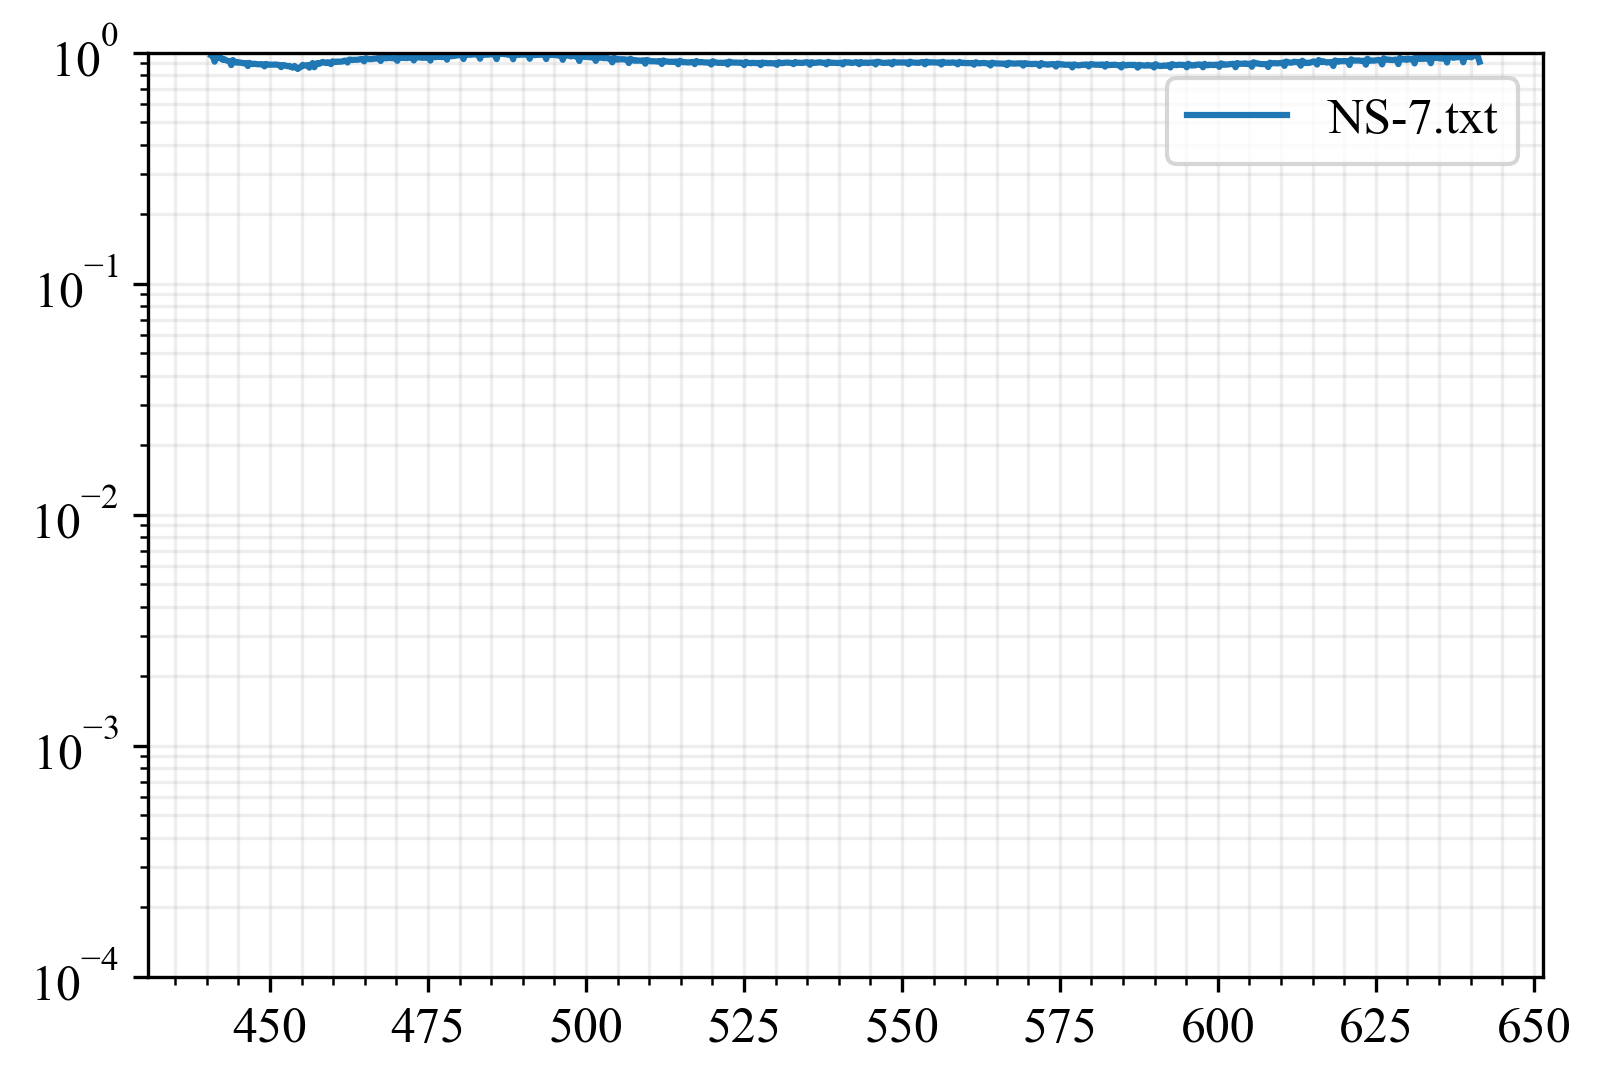

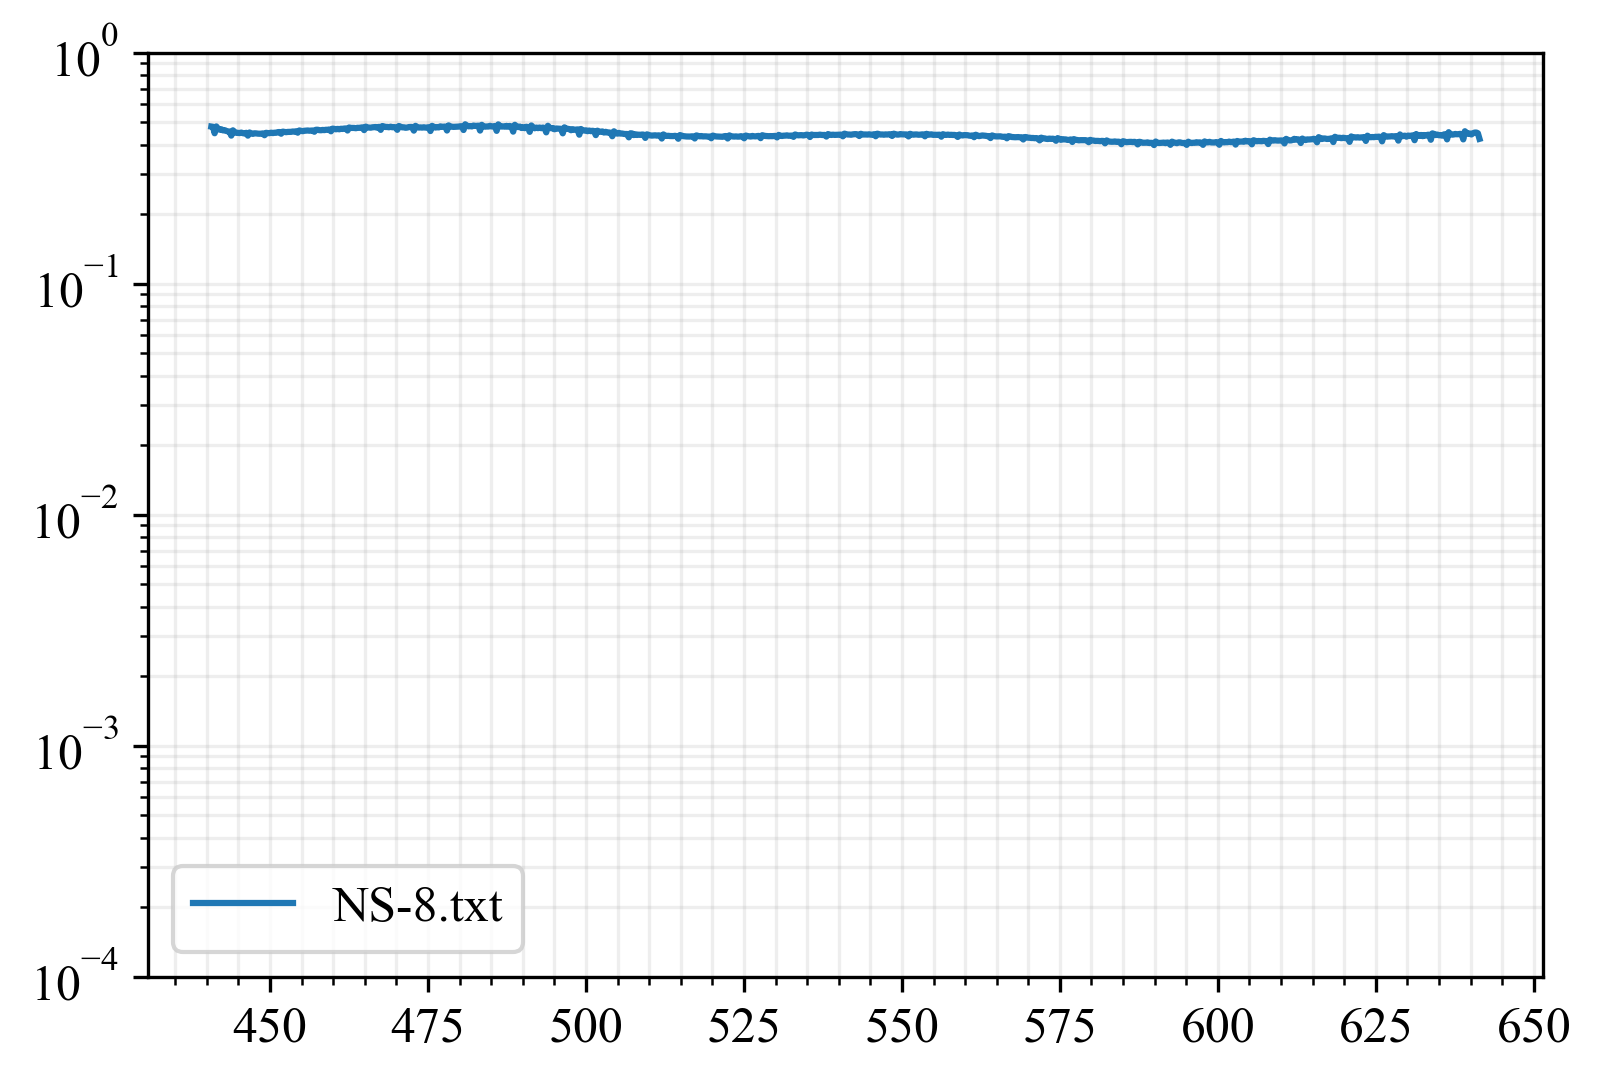

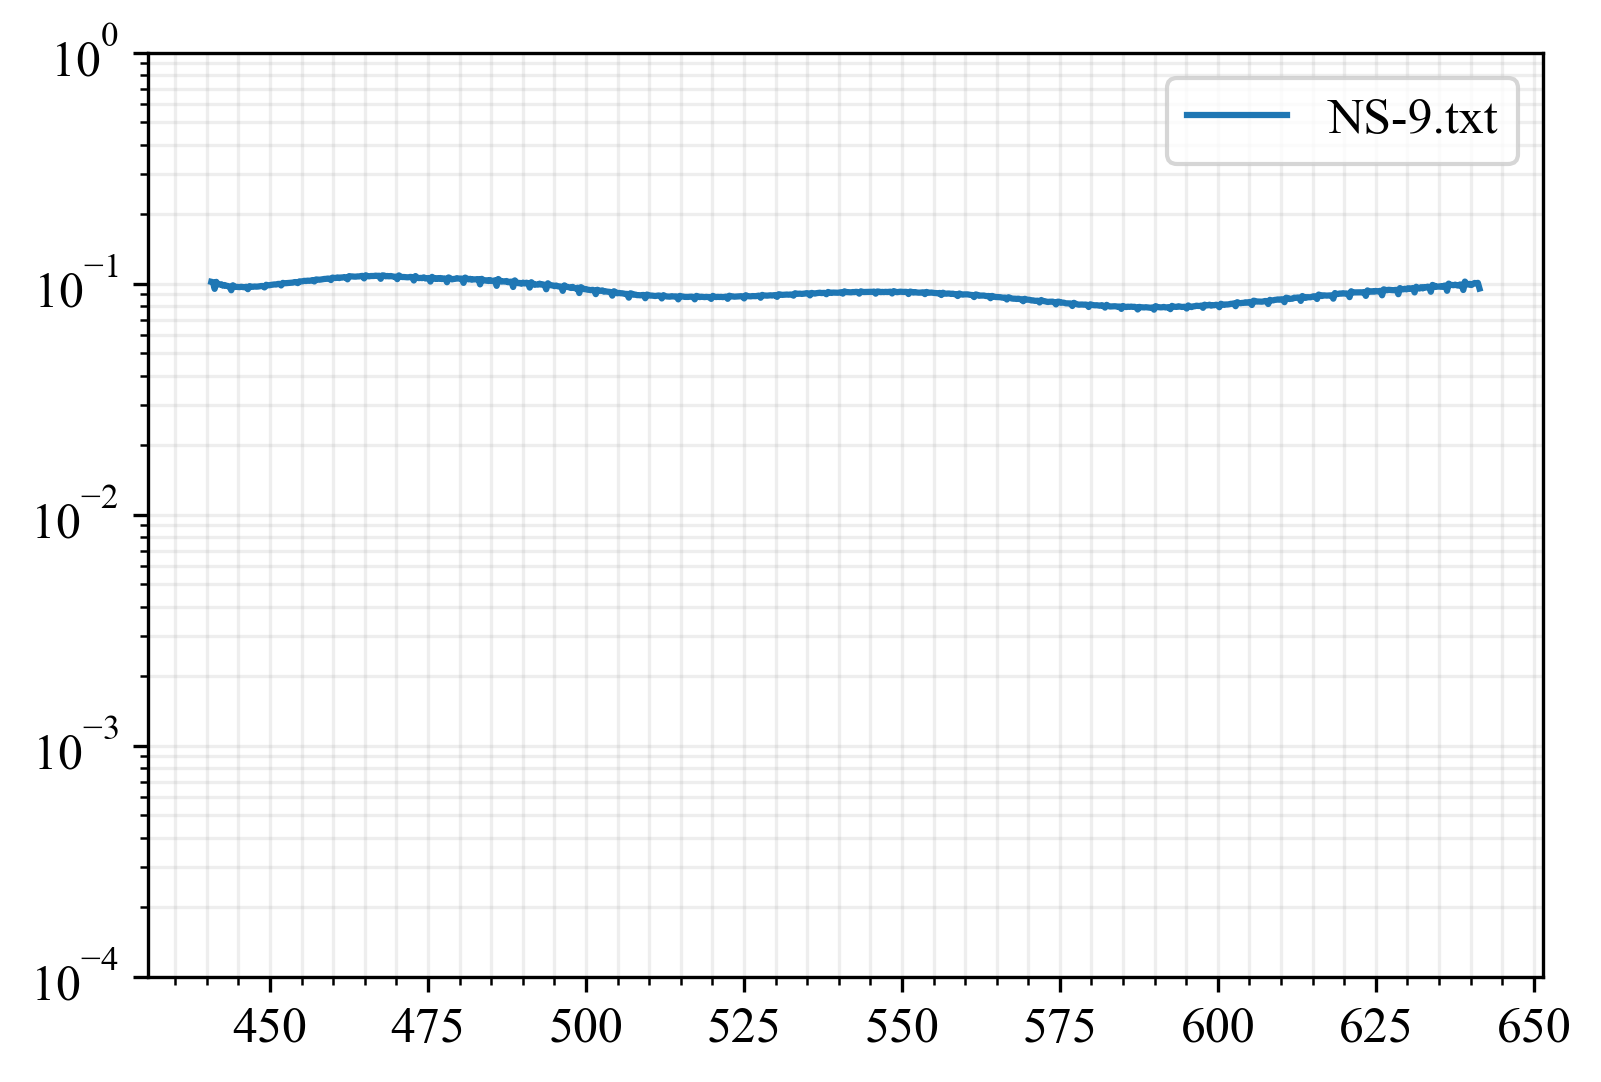

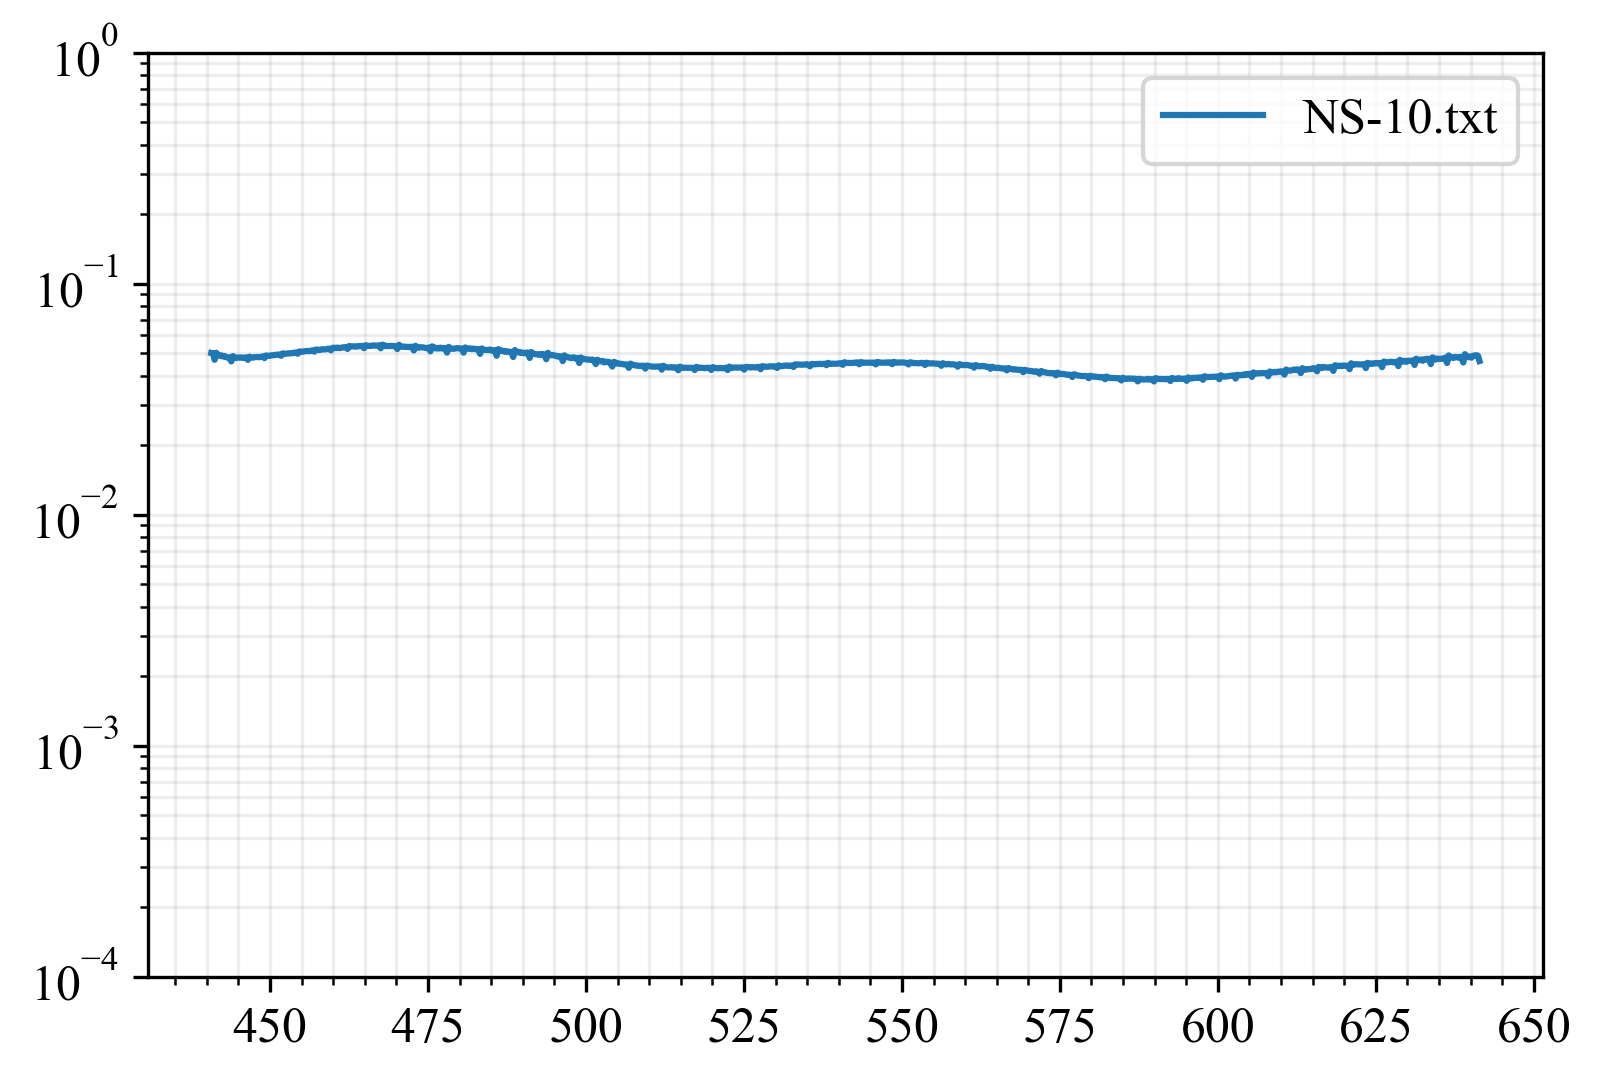

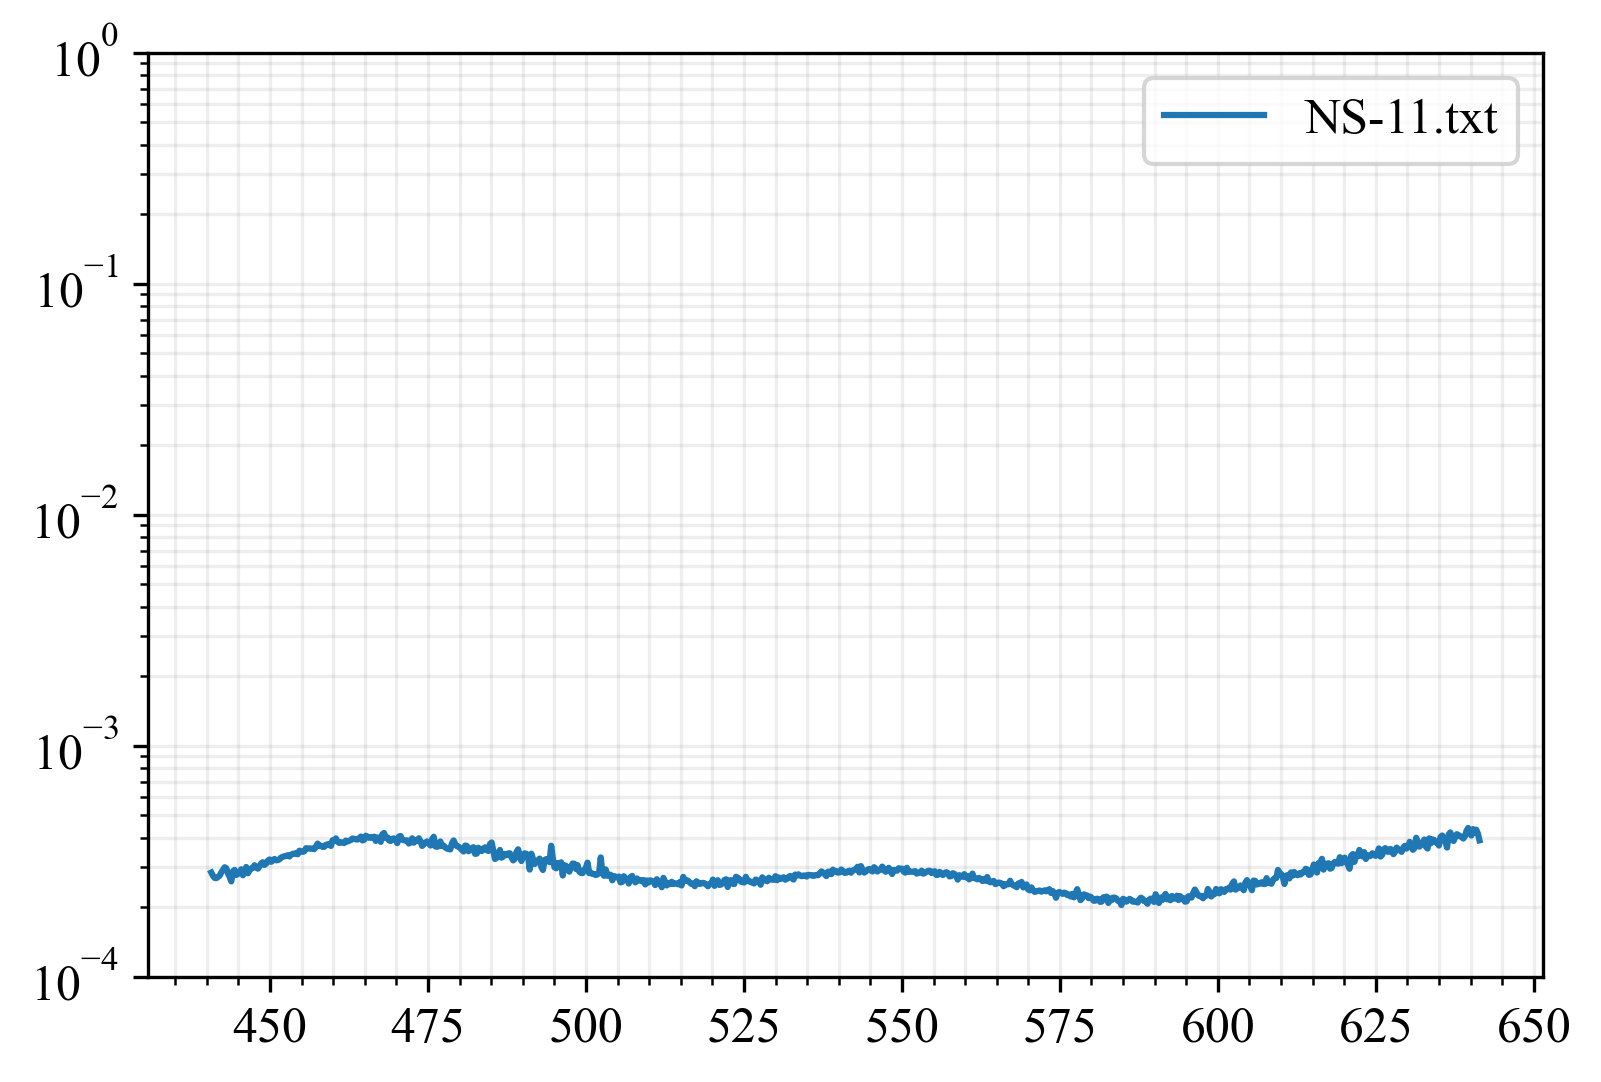

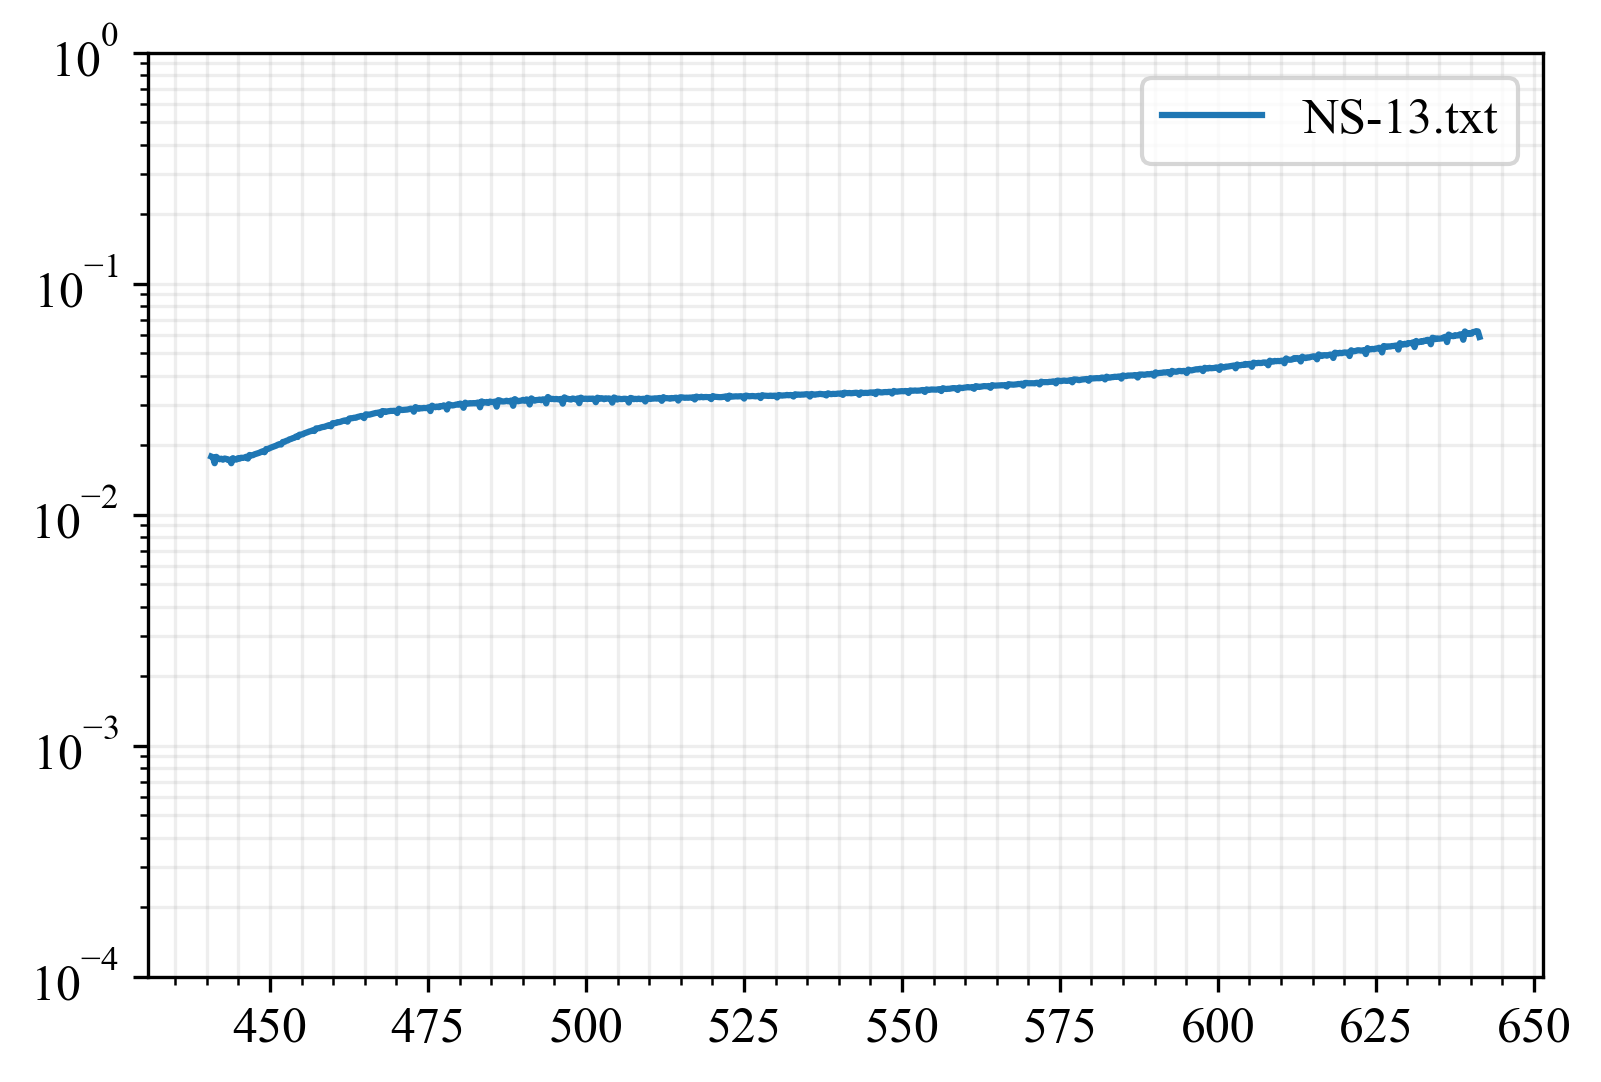

------------------
| NS-7	| 9.18e-01| 
| NS-8	| 4.42e-01| 
| NS-9	| 9.23e-02| 
| NS-10	| 4.55e-02| 
| NS-11	| 2.96e-04| 
| NS-13	| 3.61e-02| 
------------------


In [16]:
idx = empty[1] > 1e6
means = {}

for name in names:
    glass = readFile(name)
    rel = glass[1] / empty[1]
    wl = empty[0]
    means[name] = np.mean(rel[idx])

    plt.plot(wl[idx], rel[idx], label=name)
    plt.ylim(1e-4, 1)
    plt.yscale('log')
    plt.legend()
    plt.show()

print('-'*18)
for (name, mean) in means.items():
    print(f'| {name.split('.')[0]}\t| {mean:.2e}| ')
print('-'*18)

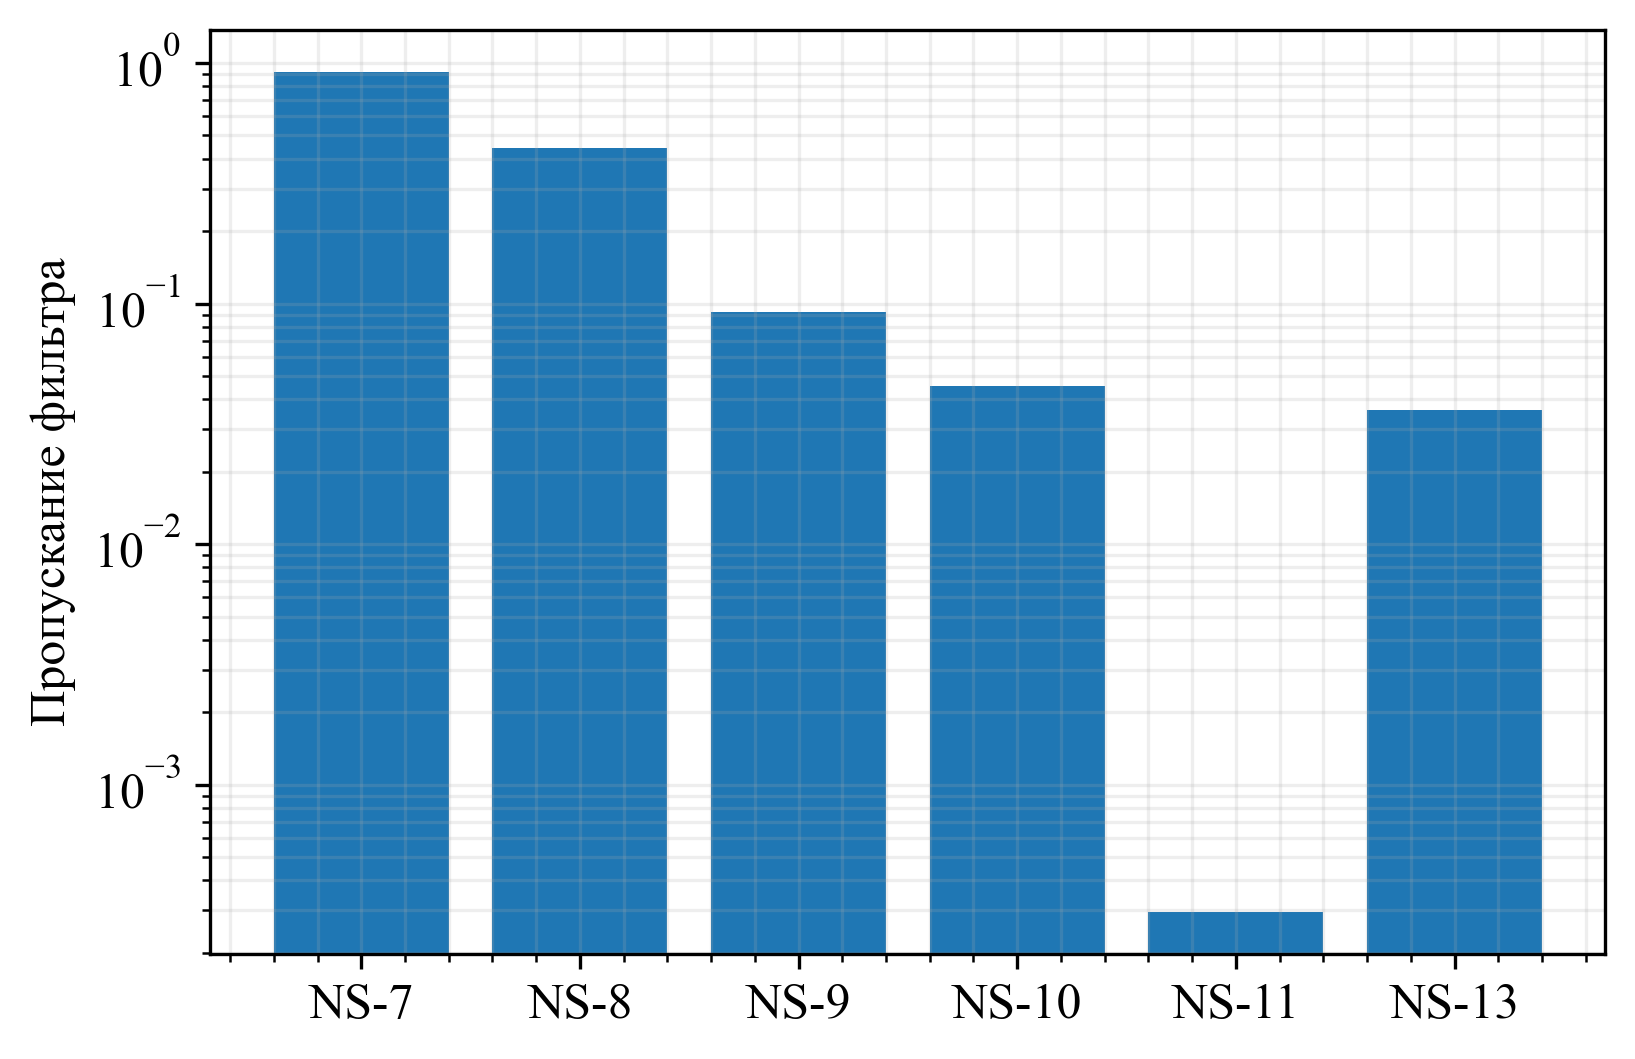

In [17]:
from pathlib import Path

plt.bar([Path(s).stem for s in means.keys()], means.values())
plt.yscale('log')
plt.ylabel('Пропускание фильтра')

plt.show()
